In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

2022-12-13 12:25:59.989003: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 12:26:00.076351: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 12:26:00.076385: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-13 12:26:00.660187: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

2022-12-13 12:26:07.736859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-13 12:26:07.737271: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-13 12:26:07.737333: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-13 12:26:07.737383: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-13 12:26:07.761040: W tensorflow/c

TensorShape([60000, 28, 28, 1])

In [5]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [6]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [7]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
  26/1875 [..............................] - ETA: 11s - loss: 1.5258 - accuracy: 0.5950

2022-12-13 12:26:20.730717: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 24840000 exceeds 10% of free system memory.
2022-12-13 12:26:20.731773: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 24840000 exceeds 10% of free system memory.
2022-12-13 12:26:20.732733: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25244800 exceeds 10% of free system memory.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.2207 - accuracy: 0.9337 - val_loss: 0.0911 - val_accuracy: 0.9734
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0849 - accuracy: 0.9740 - val_loss: 0.0529 - val_accuracy: 0.9848
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0578 - accuracy: 0.9819 - val_loss: 0.0400 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0429 - accuracy: 0.9864 - val_loss: 0.0325 - val_accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0340 - accuracy: 0.9888 - val_loss: 0.0231 - val_accuracy: 0.9930


In [8]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.9869


[0.04031587019562721, 0.9868999719619751]

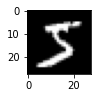

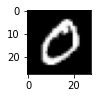

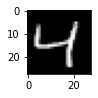

In [9]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [15]:
lenet_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [15]:
lenet_5_model.layers[0].get_weights()[1]

array([-0.02527725, -0.08090027,  0.08109065, -0.06407891,  0.10116079,
       -0.10863889], dtype=float32)

In [16]:
lenet_5_model.layers[0].get_weights()[0].astype("float32").tofile("conv1-weights.bin")
lenet_5_model.layers[2].get_weights()[0].astype("float32").tofile("conv2-weights.bin")

lenet_5_model.layers[0].get_weights()[1].astype("float32").tofile("conv1-bias.bin")
lenet_5_model.layers[2].get_weights()[1].astype("float32").tofile("conv2-bias.bin")

lenet_5_model.layers[5].get_weights()[0].astype("float32").tofile("dense1-weights.bin")
lenet_5_model.layers[6].get_weights()[0].astype("float32").tofile("dense2-weights.bin")
lenet_5_model.layers[7].get_weights()[0].astype("float32").tofile("dense3-weights.bin")

lenet_5_model.layers[5].get_weights()[1].astype("float32").tofile("dense1-bias.bin")
lenet_5_model.layers[6].get_weights()[1].astype("float32").tofile("dense2-bias.bin")
lenet_5_model.layers[7].get_weights()[1].astype("float32").tofile("dense3-bias.bin")

In [22]:
test = np.array([[(i-j)/2 for i in range(3)] for j in range(3)])
test

array([[ 0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5],
       [-1. , -0.5,  0. ]])

In [23]:
test.astype("float32").tofile("test.bin")

In [26]:
testMulti = np.array([test, test * 2, test * 3, test * -1])
testMulti

array([[[ 0. ,  0.5,  1. ],
        [-0.5,  0. ,  0.5],
        [-1. , -0.5,  0. ]],

       [[ 0. ,  1. ,  2. ],
        [-1. ,  0. ,  1. ],
        [-2. , -1. ,  0. ]],

       [[ 0. ,  1.5,  3. ],
        [-1.5,  0. ,  1.5],
        [-3. , -1.5,  0. ]],

       [[-0. , -0.5, -1. ],
        [ 0.5, -0. , -0.5],
        [ 1. ,  0.5, -0. ]]])

In [27]:
testMulti.astype("float32").tofile("testMulti.bin")

In [28]:
test.dot(testMulti[1])

array([[-2.5, -1. ,  0.5],
       [-1. , -1. , -1. ],
       [ 0.5, -1. , -2.5]])